## Student Performance Project : Problem Statement

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
1. Hours Studied: The total number of hours spent studying by each student.
2. Previous Scores: The scores obtained by students in previous tests.
3. Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
4. Sleep Hours: The average number of hours of sleep the student had per day.
5. Sample Question Papers Practiced: The number of sample question papers the student practiced.

## Target Variable:

Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.
The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

In [2]:
import pandas as pd

df=pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df.shape

(10000, 6)

In [4]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,NaN,NaN,NaN,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,NaN,NaN,NaN,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Extracurricular Activities,10000,2,No,5052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Hours,10000.0,NaN,NaN,NaN,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,NaN,NaN,NaN,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,NaN,NaN,NaN,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## One hot encoding

In [7]:
one_hot=pd.get_dummies(df["Extracurricular Activities"],drop_first=True).astype(int)
df=pd.concat([df,one_hot],axis=1)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Yes
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,1
9996,7,64,Yes,8,5,58.0,1
9997,6,83,Yes,8,5,74.0,1
9998,9,97,Yes,7,0,95.0,1


In [8]:
df.drop(columns=["Extracurricular Activities"],axis=1,inplace=True)
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,1
9996,7,64,8,5,58.0,1
9997,6,83,8,5,74.0,1
9998,9,97,7,0,95.0,1


In [9]:
df.rename(columns={"Yes":"Extracurricular-Yes"},inplace=True)
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular-Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,1
9996,7,64,8,5,58.0,1
9997,6,83,8,5,74.0,1
9998,9,97,7,0,95.0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular-Yes               10000 non-null  int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 429.8 KB


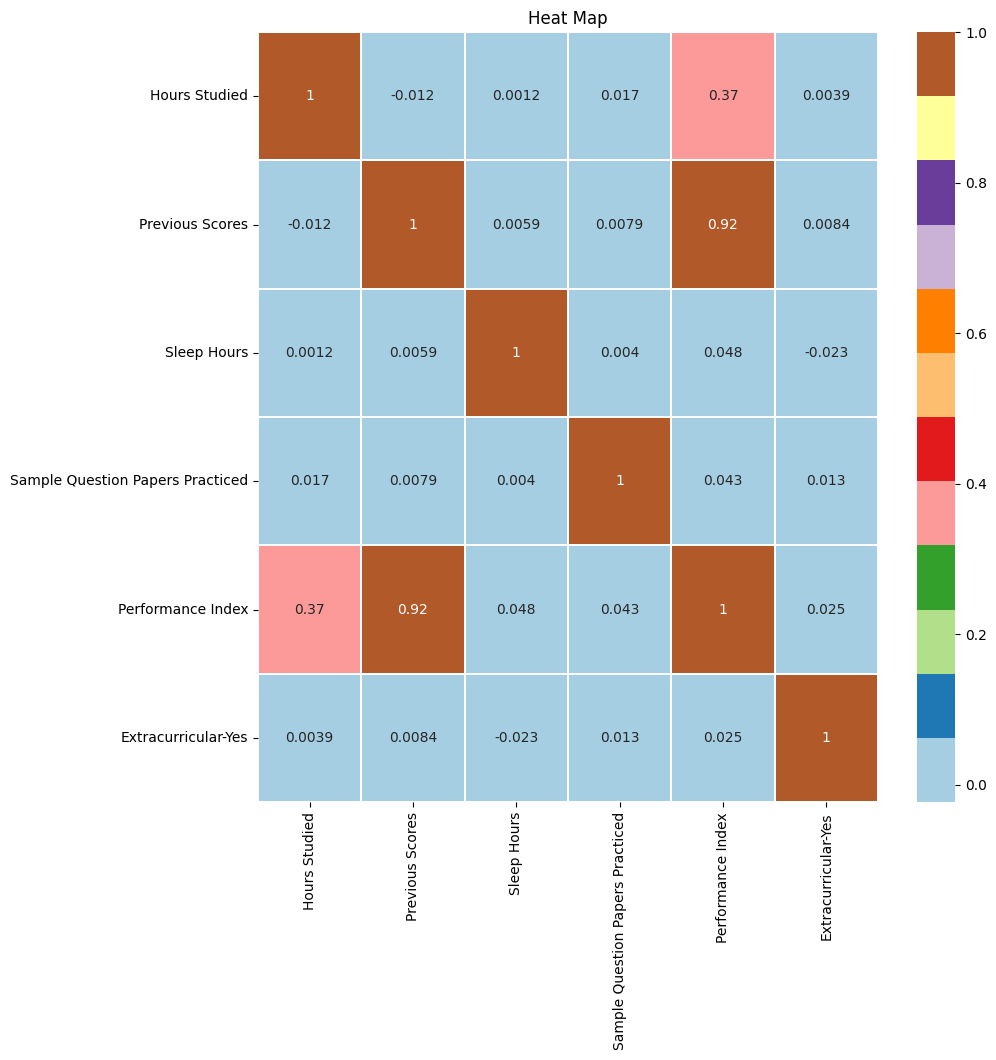

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Paired",linewidths=0.2)
plt.title("Heat Map")
plt.show()

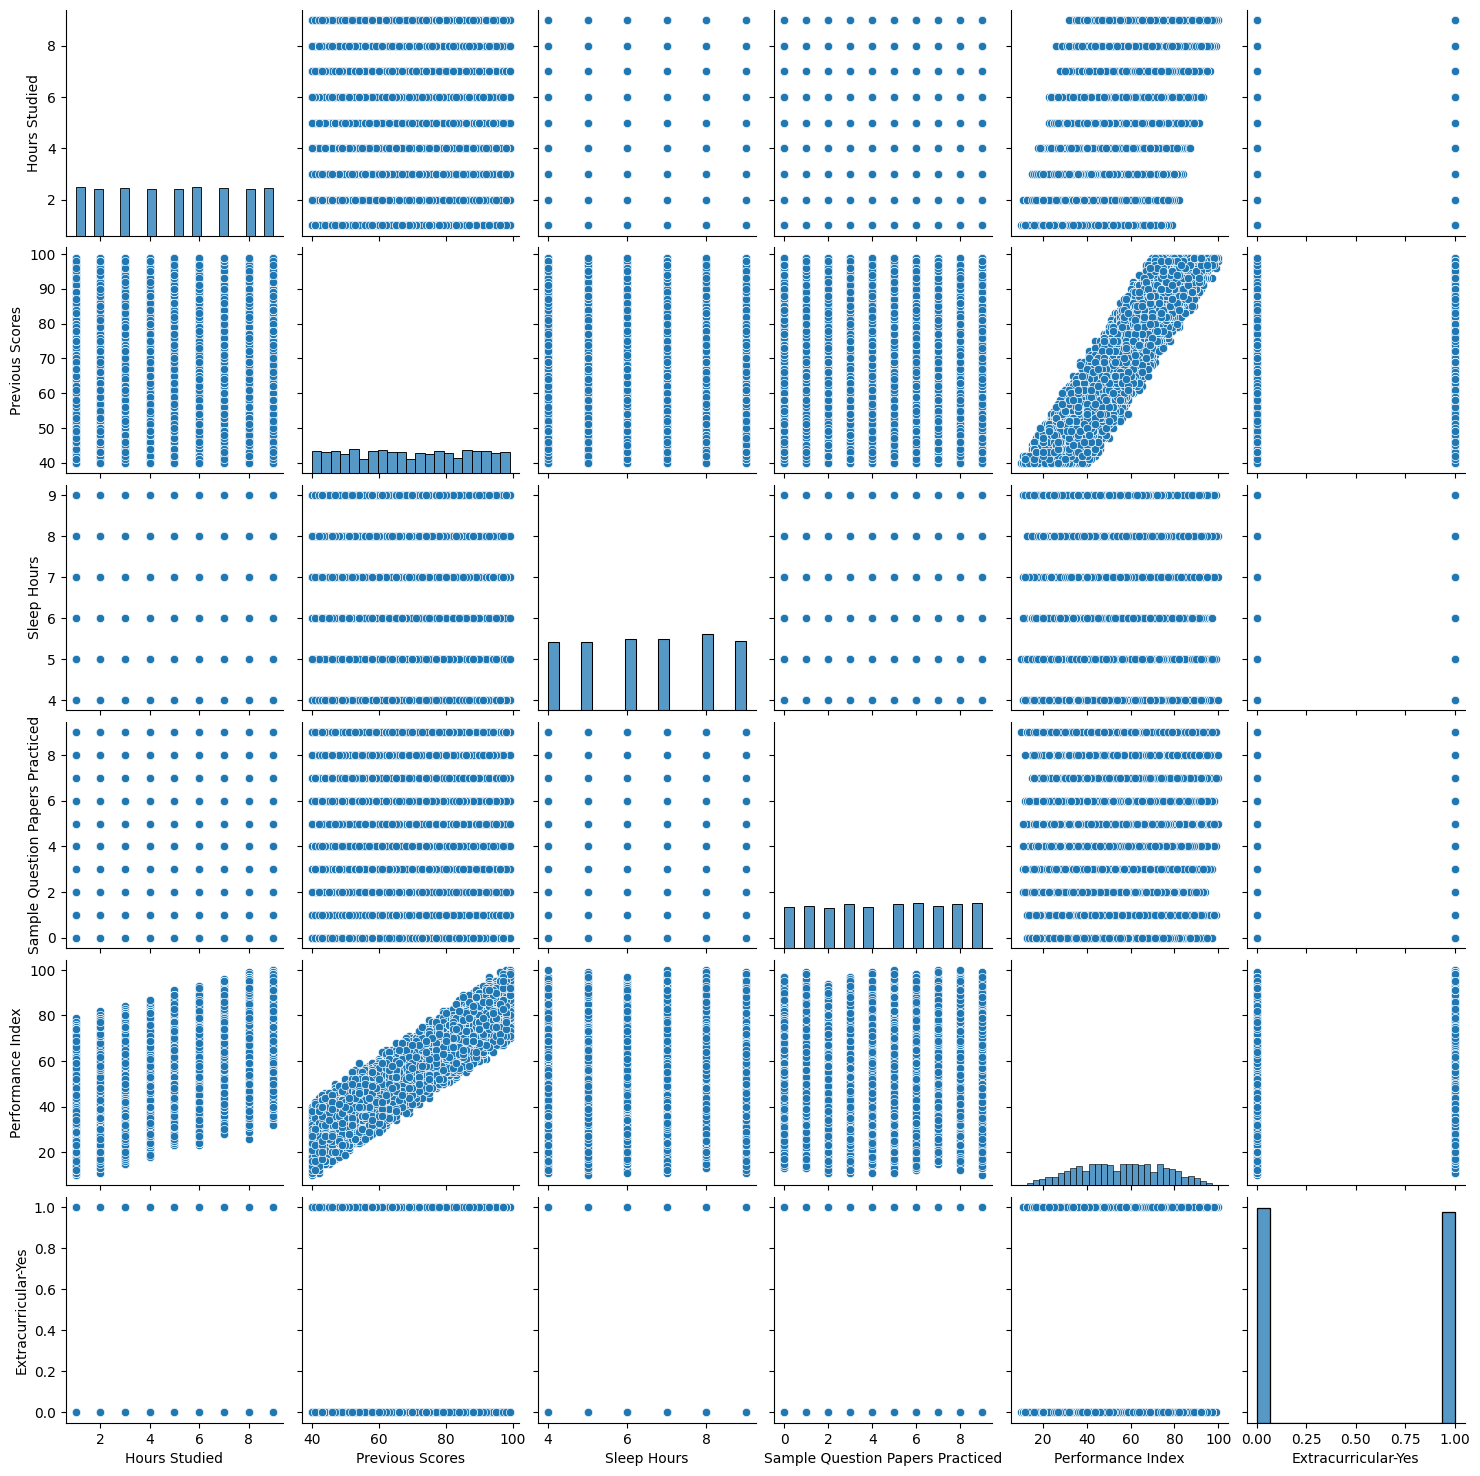

In [12]:
sns.pairplot(df)
plt.show()


## Outliers

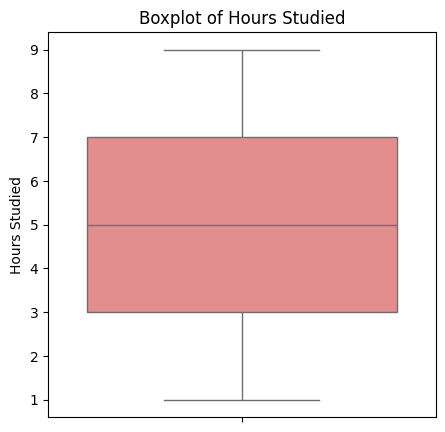

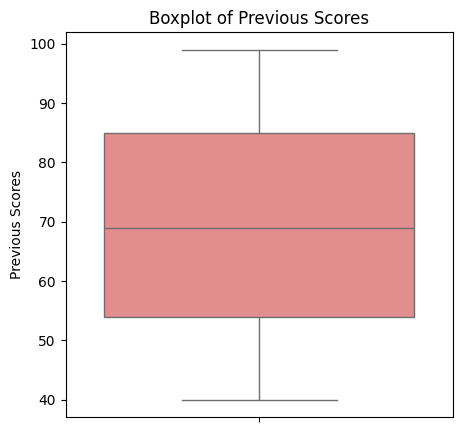

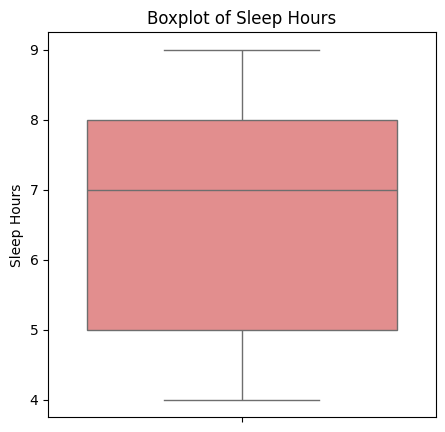

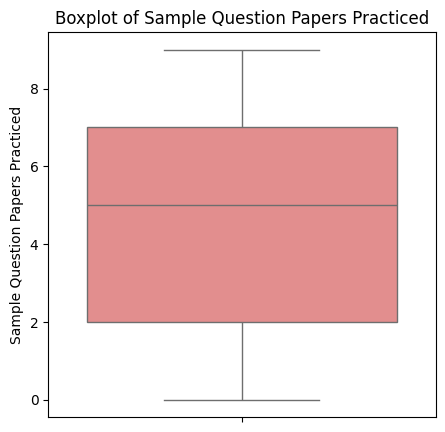

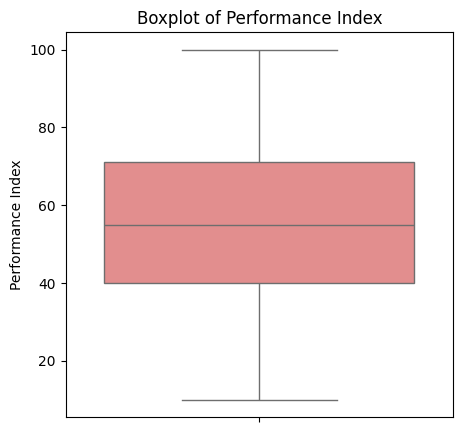

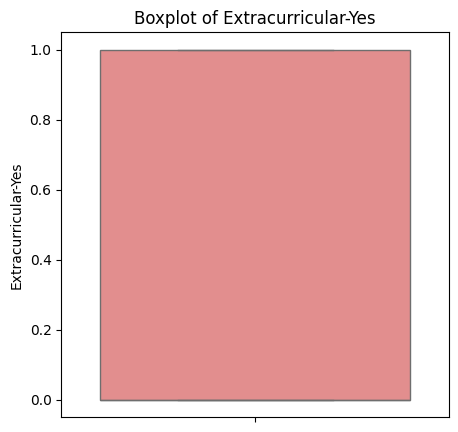

In [13]:
for col in df.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(y=df[col],color="lightcoral")
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

## AI Model Creation

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [15]:
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular-Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,1
9996,7,64,8,5,58.0,1
9997,6,83,8,5,74.0,1
9998,9,97,7,0,95.0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular-Yes               10000 non-null  int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 429.8 KB


## Multiple Linear Regression

In [17]:
x=df.drop(columns="Performance Index")
y=df["Performance Index"]



In [18]:
x

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular-Yes
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0
...,...,...,...,...,...
9995,1,49,4,2,1
9996,7,64,8,5,1
9997,6,83,8,5,1
9998,9,97,7,0,1


In [19]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # 20% (0.2) goes to test data

In [21]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test)


In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np


MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error (MAE):{MAE:,.2f}")
print(f"Mean Squared Error (MSE):{MSE:,.2f}")
print(f"Root Mean Squaered Error (RMSE):{RMSE:,.2f}")
print(f"R2 Score:{r2:,.2f}")

Mean Absolute Error (MAE):1.61
Mean Squared Error (MSE):4.08
Root Mean Squaered Error (RMSE):2.02
R2 Score:0.99


## Histogram plot : Error Distibution

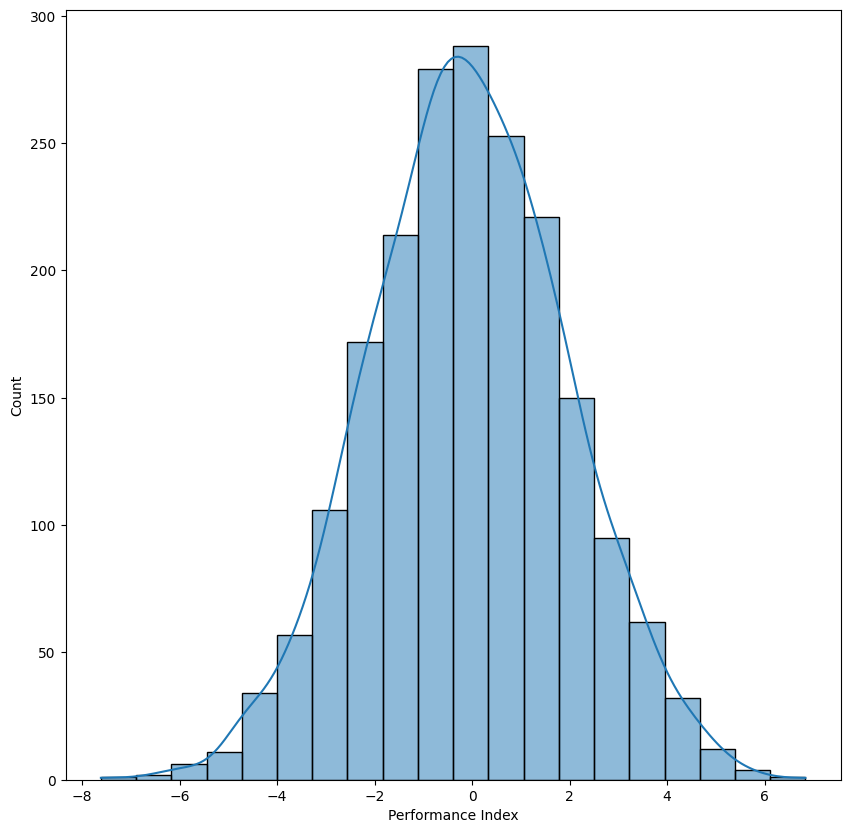

In [35]:
import seaborn as sns

H=y_test-y_pred
plt.figure(figsize=(10,10))
sns.histplot(bins=20,x=H,kde=True)
plt.show()

## Linear Model is suitable for this Problem statement as the Error follows a normal distibution (linearity)

## Scatter Plot

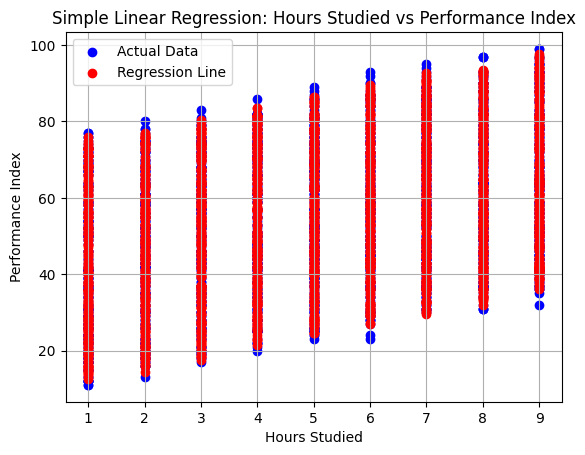

In [25]:
plt.scatter(x_test["Hours Studied"],y_test,color="blue",label="Actual Data")
plt.scatter(x_test["Hours Studied"],y_pred,color="red",label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.legend()
plt.title("Simple Linear Regression: Hours Studied vs Performance Index")
plt.grid(True)
plt.show()

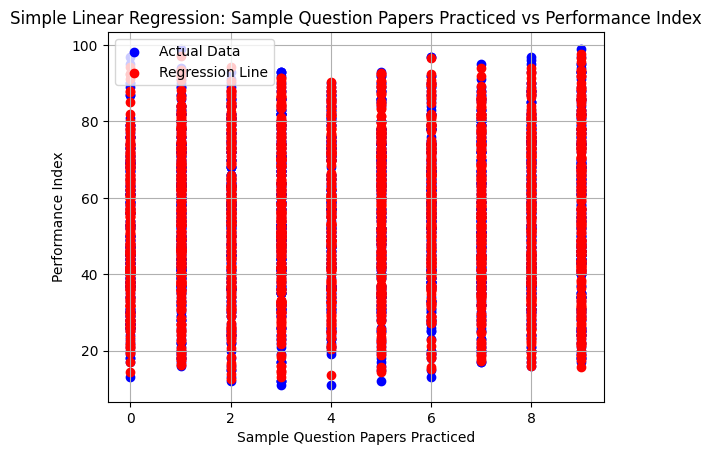

In [26]:
plt.scatter(x_test["Sample Question Papers Practiced"],y_test,color="blue",label="Actual Data")
plt.scatter(x_test["Sample Question Papers Practiced"],y_pred,color="red",label="Regression Line")
plt.xlabel("Sample Question Papers Practiced")
plt.ylabel("Performance Index")
plt.legend()
plt.title("Simple Linear Regression: Sample Question Papers Practiced vs Performance Index")
plt.grid(True)
plt.show()

## Save the Model

In [27]:
import pickle

with open("Studentperformance.pkl","wb") as f :  # wb means write in binary
    pickle.dump(model,f)

# file will be saved in the files

In [28]:
import pickle

with open("linearmodel.pkl","rb") as f:  # It is used to load the model and use the model for new  data prediction
    load_model = pickle.load(f)

## Lasso regression

In [29]:
from sklearn.linear_model import Lasso,Ridge

lasso=Lasso(alpha=0.3) 
# Here Alpha is used to give the value , how many features have to change to Zero depending on important or unimportant
lasso.fit(x_train,y_train)

Lasso(alpha=0.3)

In [30]:
y_pred = lasso.predict(x_test)  # testing data

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error (MAE):{MAE:,.2f}")
print(f"Mean Squared Error (MSE):{MSE:,.2f}")
print(f"Root Mean Squaered Error (RMSE):{RMSE:,.2f}")
print(f"R2 Score:{r2:,.2f}")

Mean Absolute Error (MAE):1.64
Mean Squared Error (MSE):4.26
Root Mean Squaered Error (RMSE):2.06
R2 Score:0.99


## Ridge regression

In [32]:
ridge=Ridge(alpha=0.3) 
# Here Alpha is used to give the value ,how many features have to reduce (shrink), depending on important or unimportant
ridge.fit(x_train,y_train)

Ridge(alpha=0.3)

In [33]:
y_pred = ridge.predict(x_test)  # testing data

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error (MAE):{MAE:,.2f}")
print(f"Mean Squared Error (MSE):{MSE:,.2f}")
print(f"Root Mean Squaered Error (RMSE):{RMSE:,.2f}")
print(f"R2 Score:{r2:,.2f}")

Mean Absolute Error (MAE):1.61
Mean Squared Error (MSE):4.08
Root Mean Squaered Error (RMSE):2.02
R2 Score:0.99
